# One dimensional kernel density estimates

A figure showing the effect of changing the bandwidth on nonparametric kernel density estimates.  Esimates are implemented using Scikit Learn.  From chapter 13.

In [5]:
%matplotlib inline

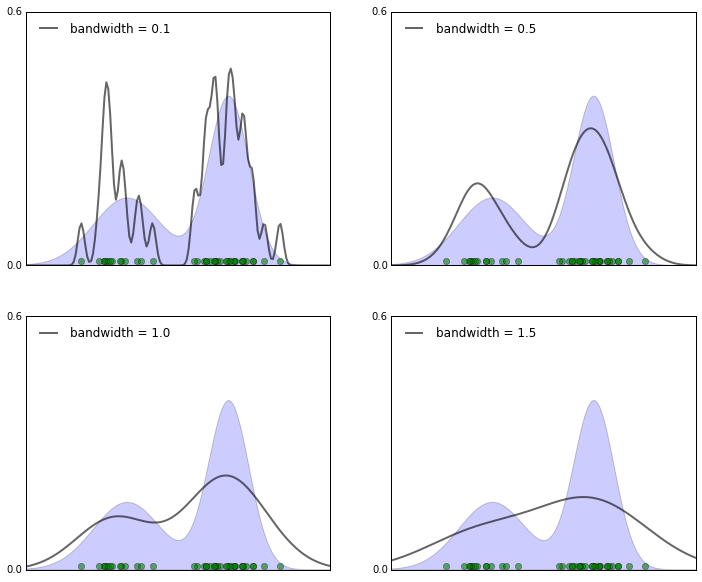

In [6]:

import numpy as np
from random import uniform
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

f, g = norm(), norm(3, 0.6)
a = 0.4

def mixnorm_pdf(s):
    return a * f.pdf(s) + (1 - a) * g.pdf(s)

def mixnorm_rvs(N):
    y = np.empty(N)
    for n in range(N):
        h = f if uniform(0, 1) < a else g
        y[n] = float(h.rvs(size=1))
    return y

xmin, xmax = -3, 6
grid_len = 160
grid = np.linspace(xmin, xmax, grid_len)
N = 40
obs = mixnorm_rvs(N)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()
bws = 0.1, 0.5, 1.0, 1.5

for bw, ax in zip(bws, axes):

    ax.set_ylim(0, 0.6)
    ax.set_yticks((0, 0.6))
    ax.set_xticks([])
    ax.fill_between(grid, 0*grid, mixnorm_pdf(grid), alpha=0.2)

    ax.plot(obs, [0.01] * N, 'go', alpha=0.6)

    kde = KernelDensity(bandwidth=bw).fit(obs.reshape(N, 1))
    log_dens = kde.score_samples(grid.reshape(grid_len, 1))
    lb = "bandwidth = {}".format(bw)
    ax.plot(grid, np.exp(log_dens), 'k-', lw=2, alpha=0.6, label=lb)
    ax.legend(loc='upper left', frameon=False)

plt.show()




